### **EDA-1**

In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the datset
df=pd.read_csv('BIKE DETAILS.csv')

In [6]:
df.shape

(1061, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [8]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [9]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [10]:
df.isna().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [11]:
#1. What is the range of selling prices in the dataset
range_of_selling_prices=df['selling_price'].max()-df['selling_price'].min()
range_of_selling_prices

755000

In [12]:
#2.What is the median selling price for bikes in the dataset
median_selling_price=df['selling_price'].median()
median_selling_price

45000.0

In [13]:
#3. What is the most common seller type
mode_common_seller_type=df['seller_type'].mode()[0]
mode_common_seller_type

'Individual'

In [14]:
#4.How many bikes have driven more than 50,000 kilometers
len(df[df['km_driven']>50000])

170

In [15]:
#5.What is the average km_driven value for each ownership type
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [16]:
#6.What proportion of bikes are from the year 2015 or older
(df['year'] <= 2015).value_counts(normalize=True).loc[True]


0.5664467483506126

In [17]:
#7. What is the trend of missing values across the dataset
print(df.isna().sum())
'''Insight >> there are missing values in only one column i.e.ex_showroom_price
and since there are 435 missing values we cannot drop that column we can replace missing value using median '''




name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


'Insight >> there are missing values in only one column i.e.ex_showroom_price\nand since there are 435 missing values we cannot drop that column we can replace missing value using median '

In [18]:
#8.What is the highest ex_showroom_price recorded, and for which bike
highest_ex_showroom_price=df['ex_showroom_price'].max()
highest_price_bike = df.loc[df['ex_showroom_price'] == highest_ex_showroom_price, 'name']
print(f"The highest ex_showroom_price recorded is {highest_ex_showroom_price}, and it is for the bike(s):")
print(highest_price_bike)



The highest ex_showroom_price recorded is 1278000.0, and it is for the bike(s):
134    Harley-Davidson Street Bob
Name: name, dtype: object


In [19]:
#9. What is the total number of bikes listed by each seller type
df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


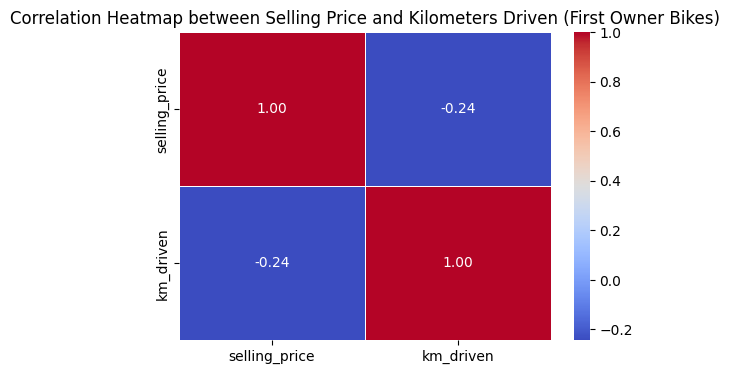

In [20]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']
correlation_matrix = first_owner_bikes[['selling_price', 'km_driven']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Selling Price and Kilometers Driven (First Owner Bikes)')
plt.show()


In [21]:
#11. Identify and remove outliers in the km_driven column using the IQR method
Q1=df['km_driven'].quantile(0.25)
Q3=df['km_driven'].quantile(0.75)
print(Q1,Q3)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(df['km_driven'])

13500.0 43000.0
29500.0
-30750.0 87250.0
0         350
1        5650
2       12000
3       23000
4       21000
        ...  
1054    50000
1055    35000
1057    33000
1058    35000
1059    53000
Name: km_driven, Length: 1022, dtype: int64


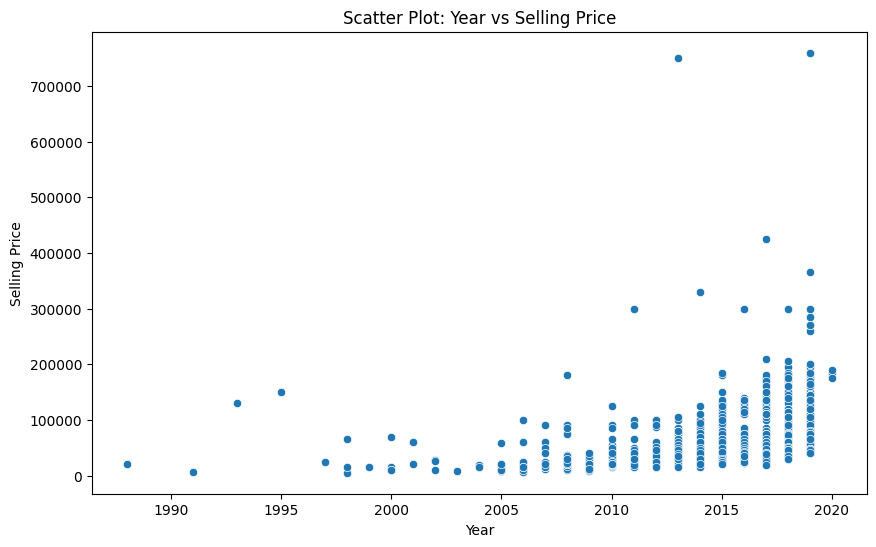

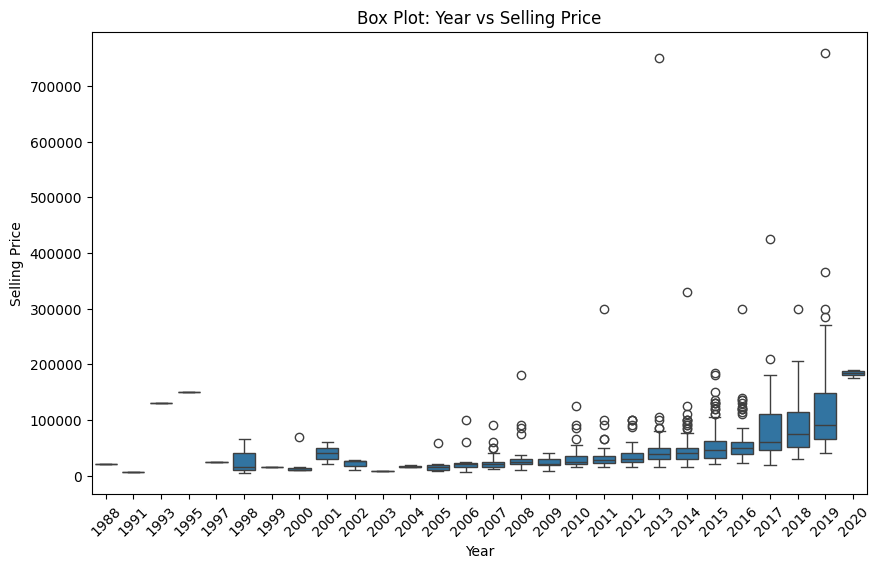

In [22]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Box Plot: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


In [23]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year
current_year=2024
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
avg_depreciation = df.groupby('age')['depreciation'].mean()
print(avg_depreciation)



age
4     34260.000000
5     -2954.562500
6    -13023.194805
7    -22307.226190
8    -28750.407407
9    -28314.291139
10   -34287.812500
11   -42766.423077
12   -36609.529412
13   -47758.750000
14   -46757.280000
15   -41398.909091
16   -53021.166667
17   -42399.000000
18   -39664.500000
19   -44852.000000
20   -36852.000000
21             NaN
22             NaN
23   -34852.000000
24             NaN
25             NaN
26             NaN
27             NaN
29             NaN
31             NaN
33             NaN
36             NaN
Name: depreciation, dtype: float64


In [24]:
#14.Which bike names are priced significantly above the average price for their manufacturing year
avg_manufacturing_year_price = df.groupby('year')['selling_price'].mean()
df['avg_price_for_year'] = df['year'].map(avg_manufacturing_year_price)
bikes_above_avg = df[df['selling_price'] > df['avg_price_for_year']]['name']
print(bikes_above_avg)


0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
3          Yamaha Fazer FI V 2.0 [2016-2018]
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
                        ...                 
1004                    Bajaj Pulsar  NS 200
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1012                     Bajaj Pulsar NS 200
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 318, dtype: object


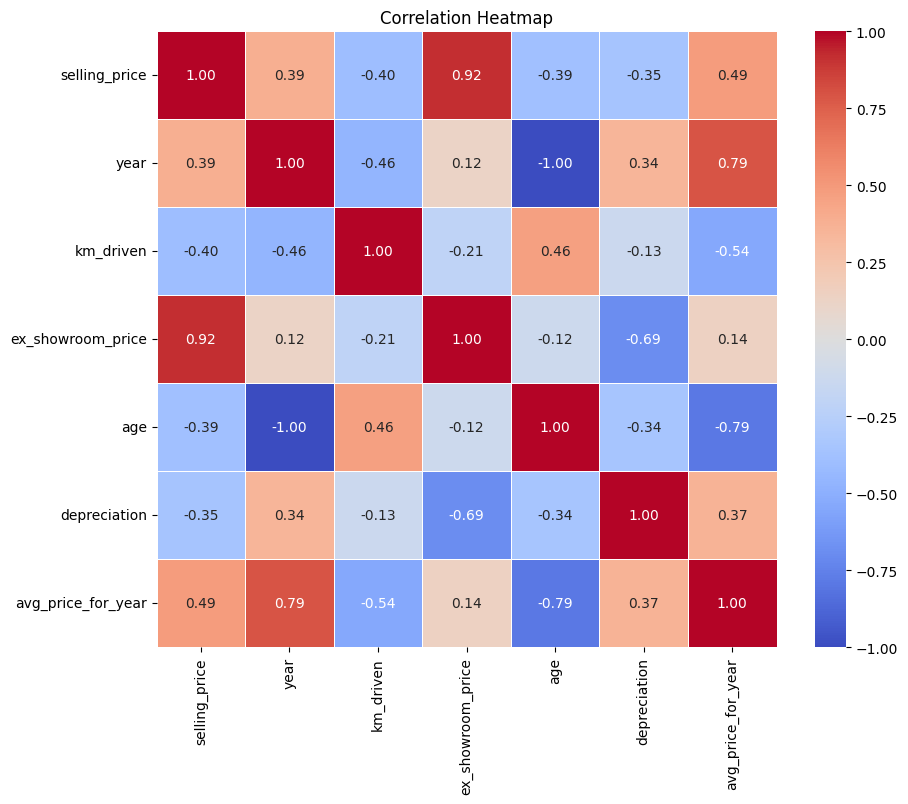

In [25]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_col=df.select_dtypes(include=['number'])
numeric_col
correlation_matrix = numeric_col.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **EDA-2**

In [26]:
df1=pd.read_csv('Car Sale.csv')

In [27]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [28]:
df1.shape

(23906, 16)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [30]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
avg_selling_price_by_dealer = df1.groupby('Dealer_Name')['Price ($)'].mean()
print(avg_selling_price_by_dealer)

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [101]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
car_brand_variation = df1.groupby('Company')['Price ($)'].std()
highest_variation_brand = car_brand_variation.idxmax()
highest_variation_value = car_brand_variation.max()
print(f"The car brand with the highest variation in prices is {highest_variation_brand} with a variation of {highest_variation_value:.2f}.")
if highest_variation_value > 10000:
    print(f"This suggests that {highest_variation_brand} offers a wide range of models, from budget-friendly to high-end luxury cars.")
else:
    print(f"This suggests that {highest_variation_brand} has a more consistent pricing strategy, with less variation in their car prices.")

The car brand with the highest variation in prices is Lincoln with a variation of 19658.05.
This suggests that Lincoln offers a wide range of models, from budget-friendly to high-end luxury cars.


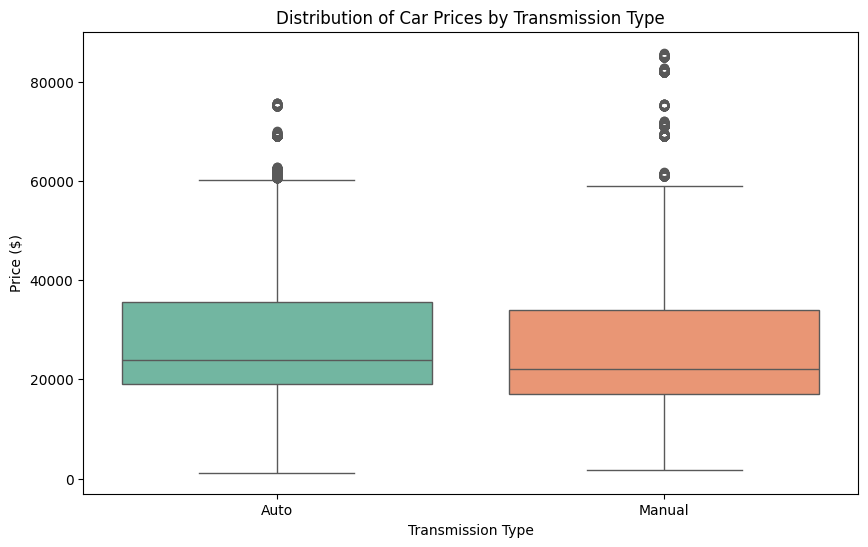

Interquartile Ranges (IQR) for Each Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [32]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Transmission', y='Price ($)', palette="Set2")
plt.title('Distribution of Car Prices by Transmission Type')
plt.ylabel('Price ($)')
plt.xlabel('Transmission Type')
plt.show()
iqr_by_transmission = df1.groupby('Transmission')['Price ($)'].quantile(0.75) - df1.groupby('Transmission')['Price ($)'].quantile(0.25)
print("Interquartile Ranges (IQR) for Each Transmission Type:")
print(iqr_by_transmission)




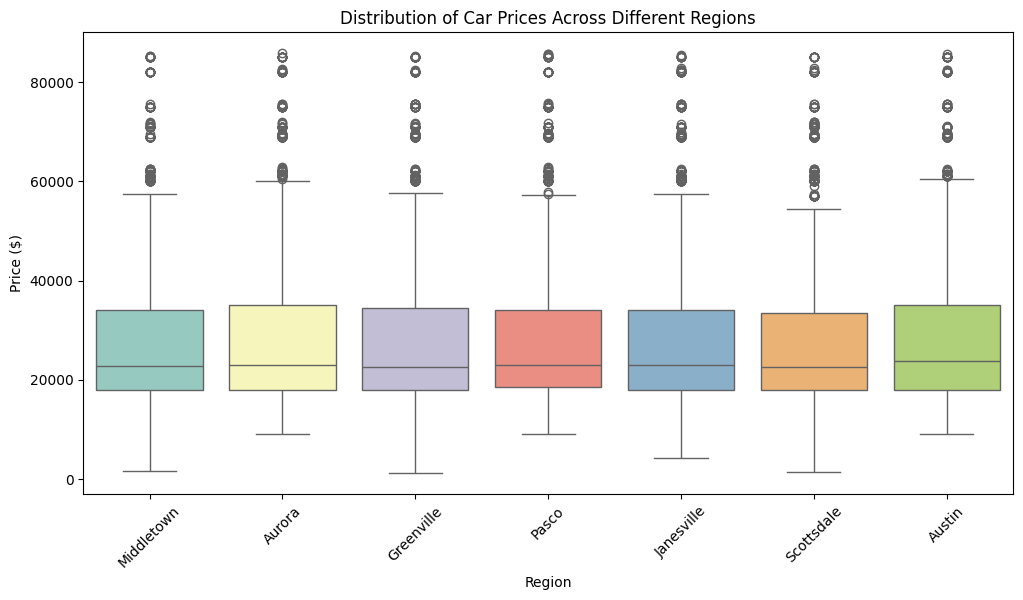

In [33]:
#4. What is the distribution of car prices across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)', palette="Set3")
plt.title('Distribution of Car Prices Across Different Regions')
plt.ylabel('Price ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

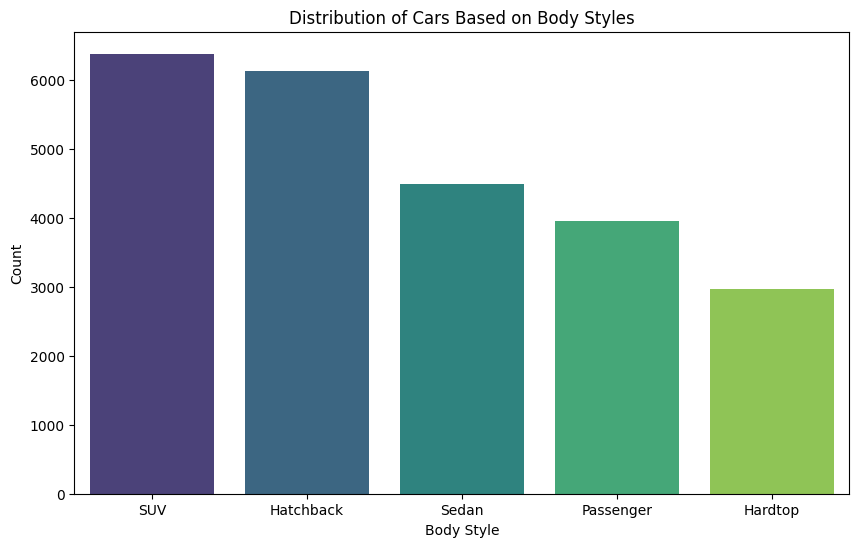

In [34]:
#5.What is the distribution of cars based on body styles
body_style_counts = df1['Body Style'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette="viridis")
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')

In [35]:
#6.How does the average selling price of cars vary by customer gender and annual income
df1.groupby(['Gender', 'Annual Income']).agg({'Price ($)': 'mean'}).unstack()

Price ($)                                                    \
Annual Income  10080         13500    24000    85000    106000   121000     
Gender                                                                      
Female              NaN  28132.038732      NaN      NaN  46001.0  20000.0   
Male            22801.0  27809.493111  61001.0  43000.0      NaN      NaN   

                                                   ...                    \
Annual Income 131000   145000   160000   170000    ... 6125000  6240000    
Gender                                             ...                     
Female             NaN      NaN      NaN      NaN  ...      NaN  42000.0   
Male           17000.0  16500.0  18334.0  14500.0  ...  19501.0      NaN   

                                                                              \
Annual Income 6400000  6460000  6500000  6600000  6800000  7650000  8000000    
Gender                                                                         
Female         32001.0  14000.0      NaN      NaN      NaN      NaN      NaN   
Male           71000.0      NaN  25000.0  39000.0  15000.0  21000.0  85000.0   

                        
Annual Income 11200000  
Gender                  
Female             NaN  
Male           26001.0  

[2 rows x 2508 columns]

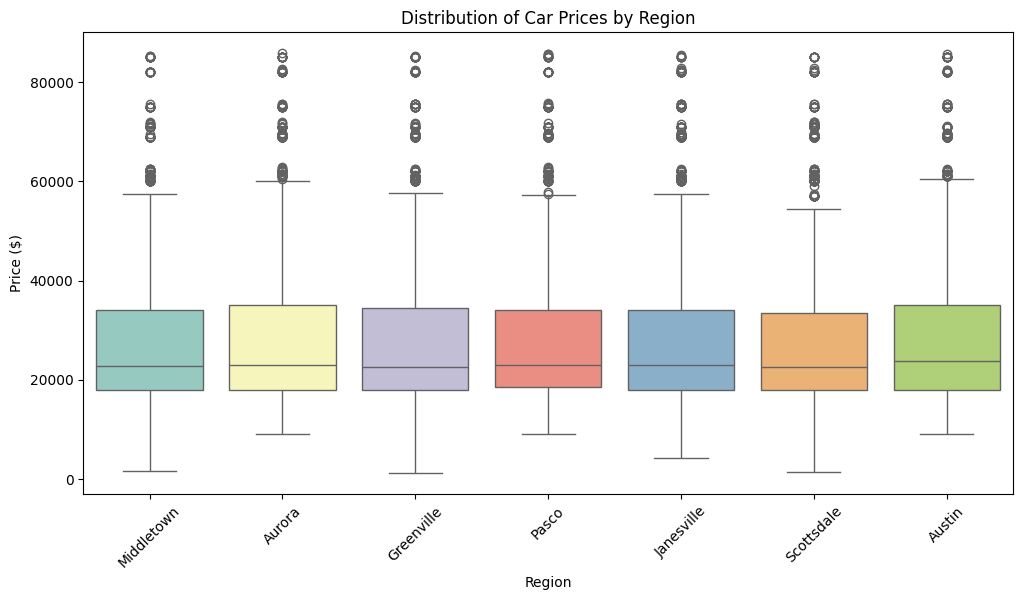

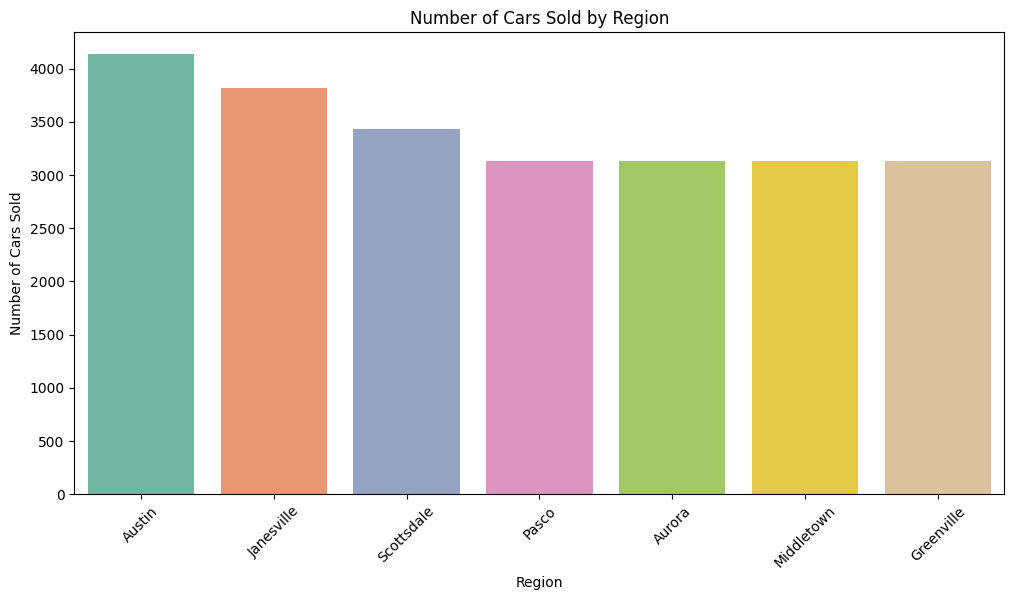

In [36]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region
#1.Distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)', palette="Set3")
plt.title('Distribution of Car Prices by Region')
plt.ylabel('Price ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()
# 2. Number of cars sold by region
cars_sold_by_region = df1['Dealer_Region'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette="Set2")
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


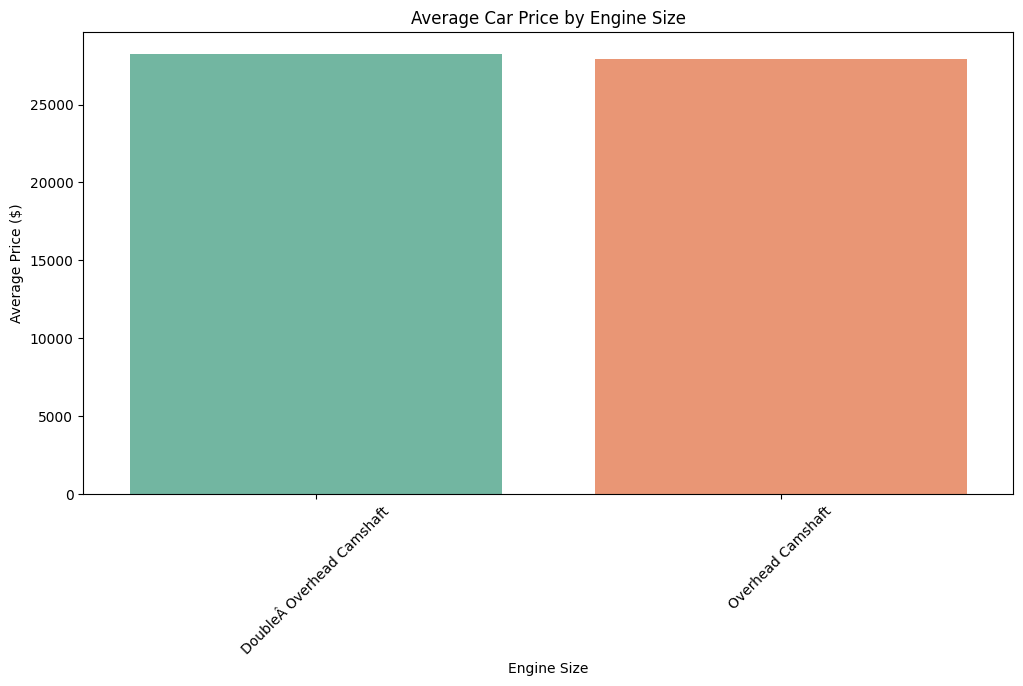

In [37]:
#8.How does the average car price differ between cars with different engine size
avg_price_by_engine_size=df1.groupby('Engine')['Price ($)'].mean()
print(avg_price_by_engine_size)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_engine_size.index, y=avg_price_by_engine_size.values, palette="Set2")
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

Income Bracket
High Income    28148.558531
Low Income     27884.297820
Name: Price ($), dtype: float64


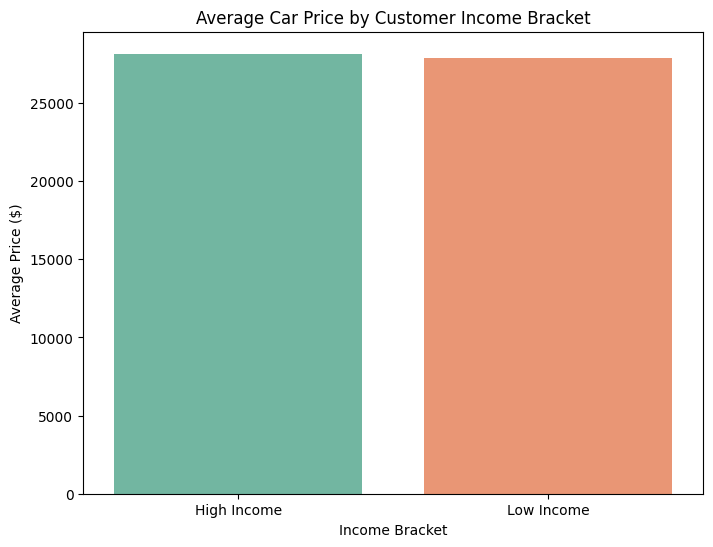

In [38]:
#9. How do car prices vary based on the customer’s annual income bracket
# Step 1: Create income brackets
def categorize_income(income):
    if income < 30000:
        return 'Low Income'
    else:
        return 'High Income'
df1['Income Bracket'] = df1['Annual Income'].apply(categorize_income)
avg_price_by_income_bracket = df1.groupby('Income Bracket')['Price ($)'].mean()
print(avg_price_by_income_bracket)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_income_bracket.index, y=avg_price_by_income_bracket.values, palette="Set2")
plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.show()


Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: Price ($), dtype: int64


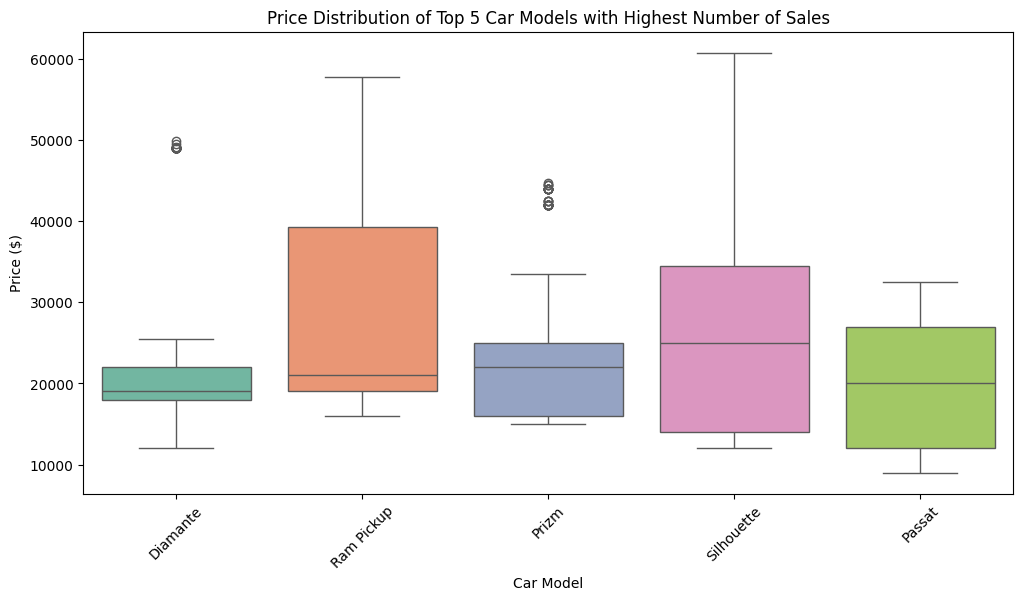

In [39]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_5_models = df1.groupby('Model')['Price ($)'].count().nlargest(5)
print(top_5_models)
# Step 2: Filter the dataset to include only the top 5 models
top_5_df = df1[df1['Model'].isin(top_5_models.index)]

# Step 3: Plot the price distribution for each of the top 5 car models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_df, palette="Set2")

# Add title and labels
plt.title('Price Distribution of Top 5 Car Models with Highest Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

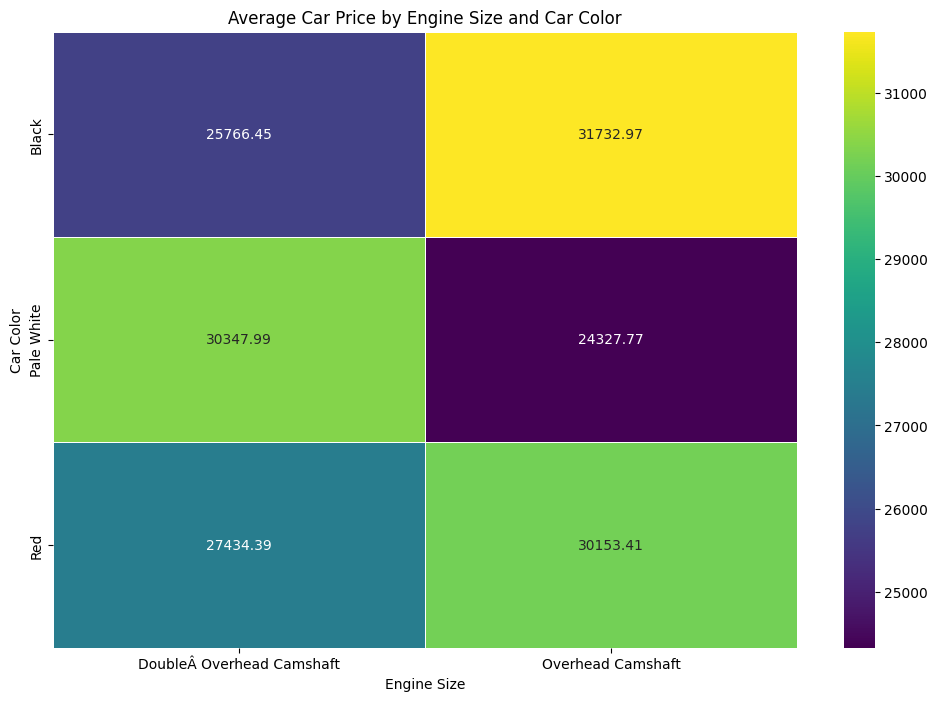

In [40]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation
price_by_color_engine = df1.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(price_by_color_engine, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Average Car Price by Engine Size and Car Color')
plt.xlabel('Engine Size')
plt.ylabel('Car Color')
plt.show()


<Axes: xlabel='Month'>

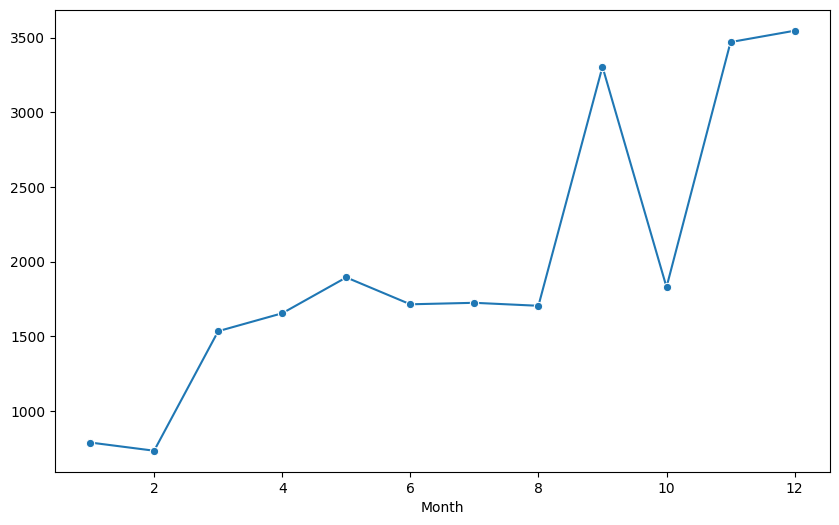

In [41]:
#12.Is there any seasonal trend in car sales based on the date of sale
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
monthly_sales = df1.groupby('Month').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')

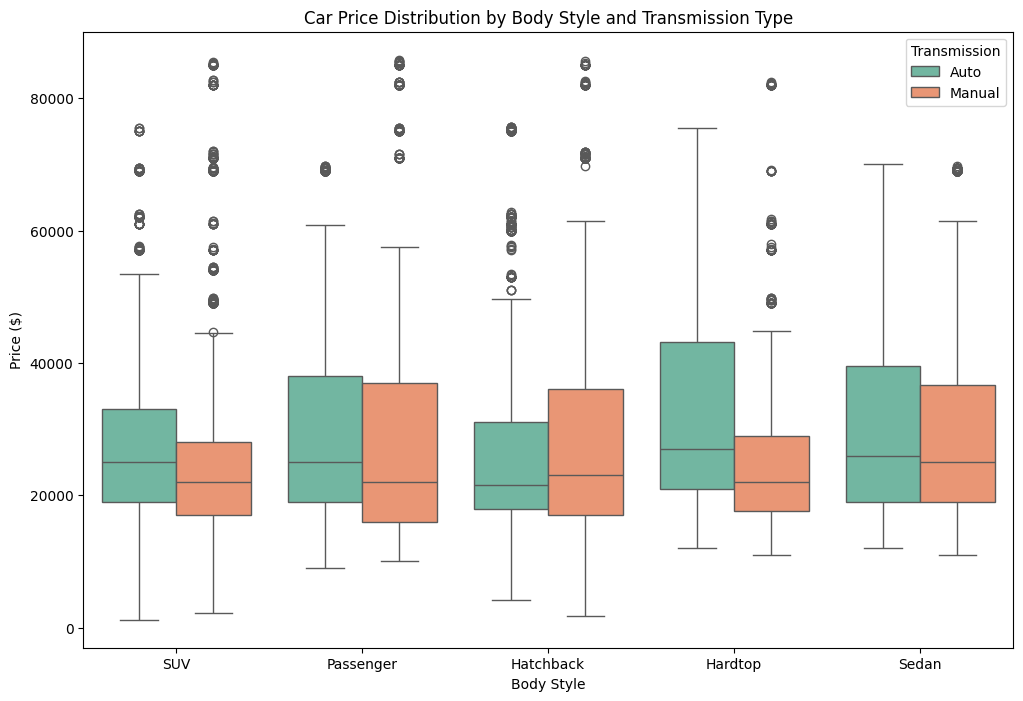

In [42]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, x='Body Style', y='Price ($)', hue='Transmission', palette="Set2")
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.show()


               Price ($)    Engine  Annual Income
Price ($)       1.000000 -0.011271       0.012065
Engine         -0.011271  1.000000      -0.006598
Annual Income   0.012065 -0.006598       1.000000


<Axes: >

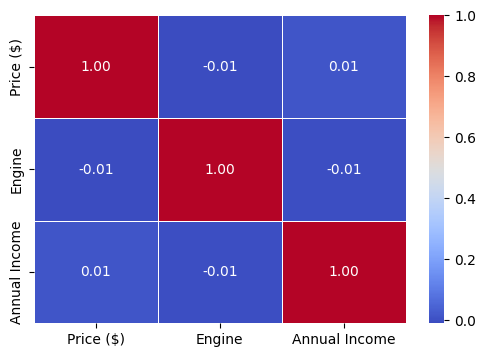

In [103]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Engine']=le.fit_transform(df1['Engine'])
correlation_matrix = df1[['Price ($)', 'Engine', 'Annual Income']].corr()
print(correlation_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)

In [44]:
#15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print(avg_price_by_model_engine)

Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


# **EDA-3**

In [45]:
df2=pd.read_csv('amazon.csv')
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [46]:
df2.shape

(1465, 16)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [48]:
df2['rating']

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4
1461,4.1
1462,3.6
1463,4


In [49]:
#1.What is the average rating for each product category
df2['rating']=pd.to_numeric(df2['rating'],errors='coerce')
df2.groupby('category')['rating'].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [50]:
df2['rating_count'].unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [51]:
df2['discounted_price'].isna().sum()
df2['discounted_price'].unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [52]:
#2. What are the top rating_count products by category
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')
df2['rating_count'] = df2['rating_count'].fillna(df2['rating_count'].mean())

top_products_by_category = df2.loc[df2.groupby('category')['rating_count'].idxmax()]

print(top_products_by_category[['category', 'product_name', 'rating_count']])


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...    348.217791  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...    348.217791  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...    348.217791  
748

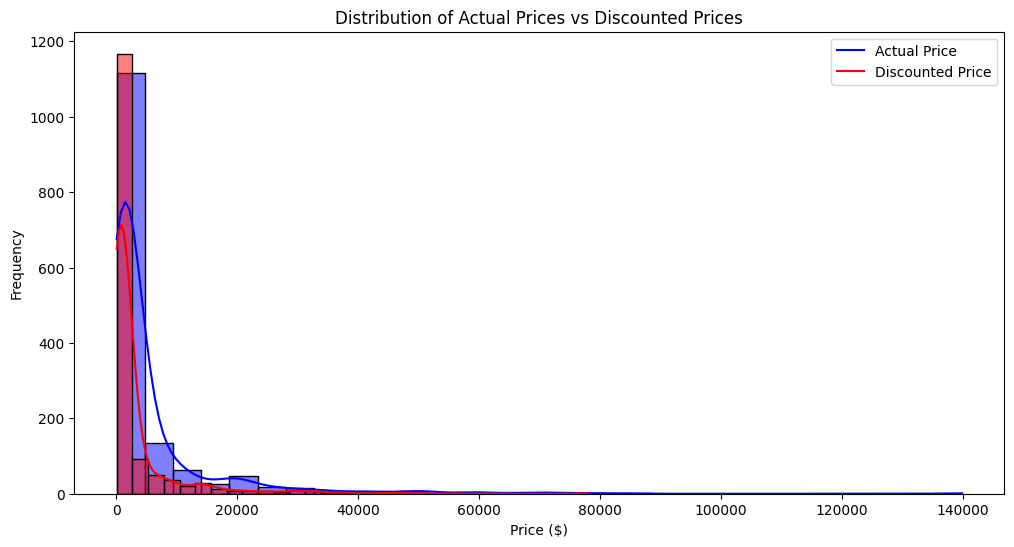

In [53]:
#3. What is the distribution of discounted prices vs. actual price
df2['actual_price'] = df2['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df2['discounted_price'] = df2['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
plt.figure(figsize=(12, 6))
sns.histplot(df2['actual_price'], kde=True, color='blue', label='Actual Price', bins=30)
sns.histplot(df2['discounted_price'], kde=True, color='red', label='Discounted Price', bins=30)
plt.title('Distribution of Actual Prices vs Discounted Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend(labels=['Actual Price', 'Discounted Price'])
plt.show()


In [54]:
#4. How does the average discount percentage vary across categories
df2['discount_percentage']=df2['discount_percentage'].str.replace('%','').astype(float)
avg_discount_percentage_by_category = df2.groupby('category')['discount_percentage'].mean()
print(avg_discount_percentage_by_category)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

In [55]:
#5.What are the most popular product names
df2['product_name'].value_counts().head()

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3


In [56]:
#6.What are the most popular product keywords
df2['category'].value_counts().head()

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


In [57]:
#7.What are the most popular product reviews
df2['rating'].value_counts().head()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,181
3.9,123


In [58]:
#8.What is the correlation between discounted_price and rating
correlation_matrix = df2[['discounted_price', 'rating']].corr()
print(correlation_matrix)

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [59]:
#9. What are the Top 5 categories based on the highest ratings
top_5_categories = df2.groupby('category')['rating'].mean().nlargest(5)
print(top_5_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [60]:
#10. Identify any potential areas for improvement or optimization based on the data analysis
'''By optimizing pricing strategies, improving product descriptions, fostering customer satisfaction,
and analyzing sales and ratings data in more detail, you can significantly enhance both the customer experience and overall
sales performance. These actions, driven by insights from your dataset, can help in refining product offerings,
marketing approaches, and inventory management strategies.'''

'By optimizing pricing strategies, improving product descriptions, fostering customer satisfaction,\nand analyzing sales and ratings data in more detail, you can significantly enhance both the customer experience and overall\nsales performance. These actions, driven by insights from your dataset, can help in refining product offerings,\nmarketing approaches, and inventory management strategies.'

# **EDA-4**

In [61]:
df3=pd.read_csv('spotify.csv')
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [62]:
df3.shape

(440, 5)

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [64]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
print(f"Number of null values in each columns: {df3.isna().sum()}")
print(f"Number of duplicate row :{df3.duplicated().sum()}")
df3.drop_duplicates(inplace=True)
print(f"Number of duplicate row :{df3.duplicated().sum()}")

Number of null values in each columns: Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate row :27
Number of duplicate row :0


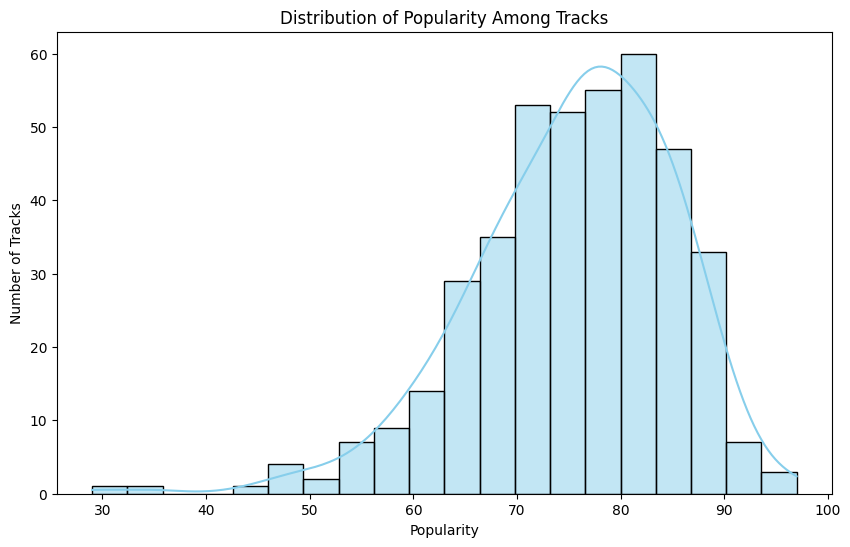

In [105]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df3['Popularity'], bins=20, color='skyblue',kde=True)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()


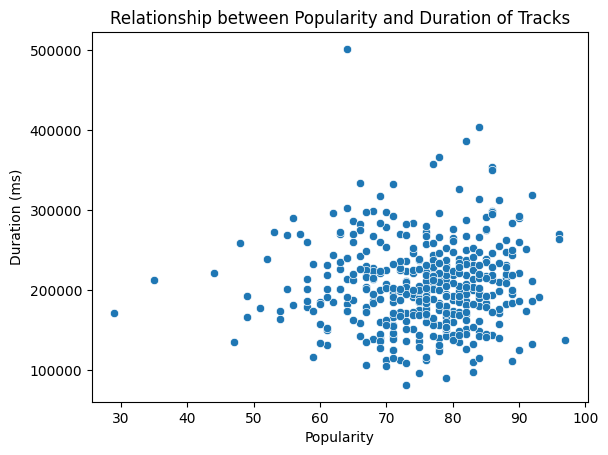

In [66]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
sns.scatterplot(data=df3, x='Popularity', y='Duration (ms)')
plt.title('Relationship between Popularity and Duration of Tracks')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

Artist
Drake        17
Eminem       11
Flo Rida     10
Ludacris     10
Timbaland    10
Name: count, dtype: int64


Text(0.5, 1.0, 'Count of Tracks by Artist')

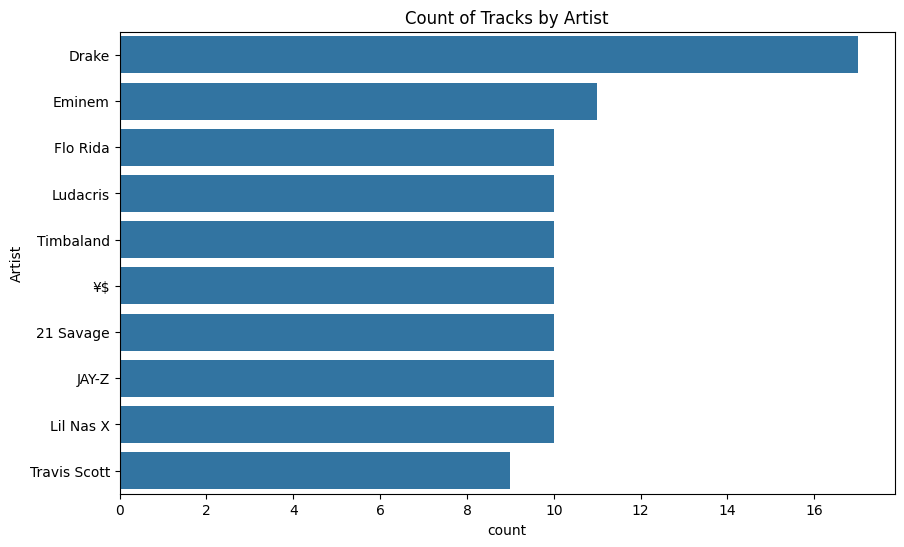

In [71]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
print(df3['Artist'].value_counts().head())
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, y='Artist', order=df3['Artist'].value_counts().index[:10])
plt.title('Count of Tracks by Artist')

In [77]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
print(df3.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64


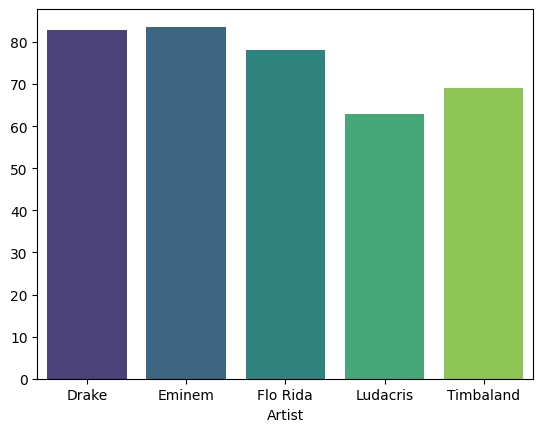

In [78]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top_5_artists = df3['Artist'].value_counts().head().index
avg_popularity_by_artist = df3[df3['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print(avg_popularity_by_artist)
sns.barplot(x=avg_popularity_by_artist.index, y=avg_popularity_by_artist.values, palette="viridis")
plt.show()

In [80]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_5_artists = df3['Artist'].value_counts().head().index
top_tracks_by_artist = df3[df3['Artist'].isin(top_5_artists)]
top_tracks_by_artist = top_tracks_by_artist.loc[top_tracks_by_artist.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name']]
print(top_tracks_by_artist)


        Artist                               Track Name
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)
80      Eminem                               Without Me
300   Flo Rida                       Low (feat. T-Pain)
371   Ludacris                             My Chick Bad
380  Timbaland                            The Way I Are


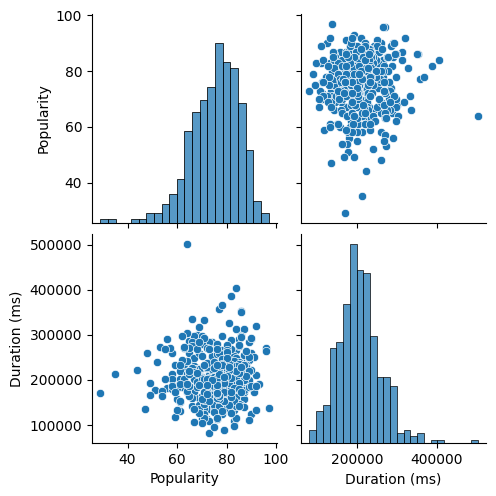

In [88]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df3[['Popularity', 'Duration (ms)']], palette="viridis")
plt.show()



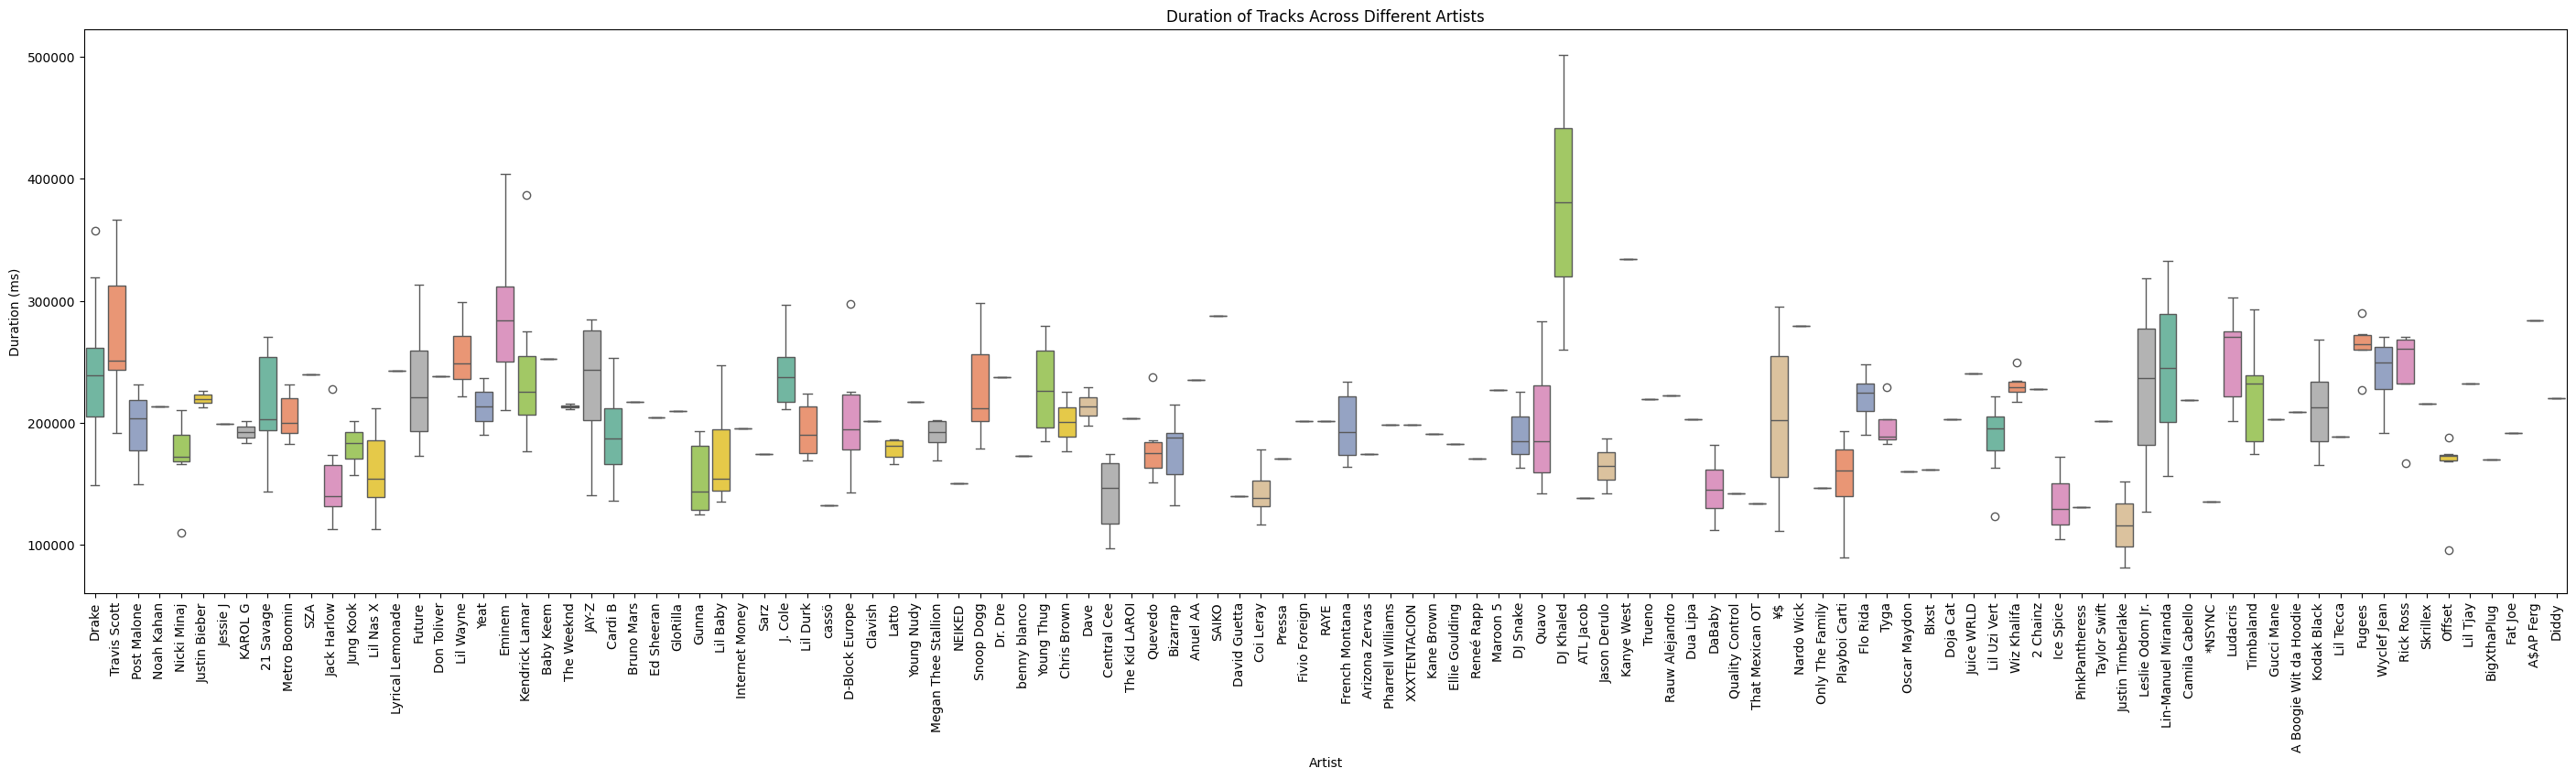

In [95]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(35, 8))
sns.boxplot(data=df3, x='Artist', y='Duration (ms)', palette="Set2")
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

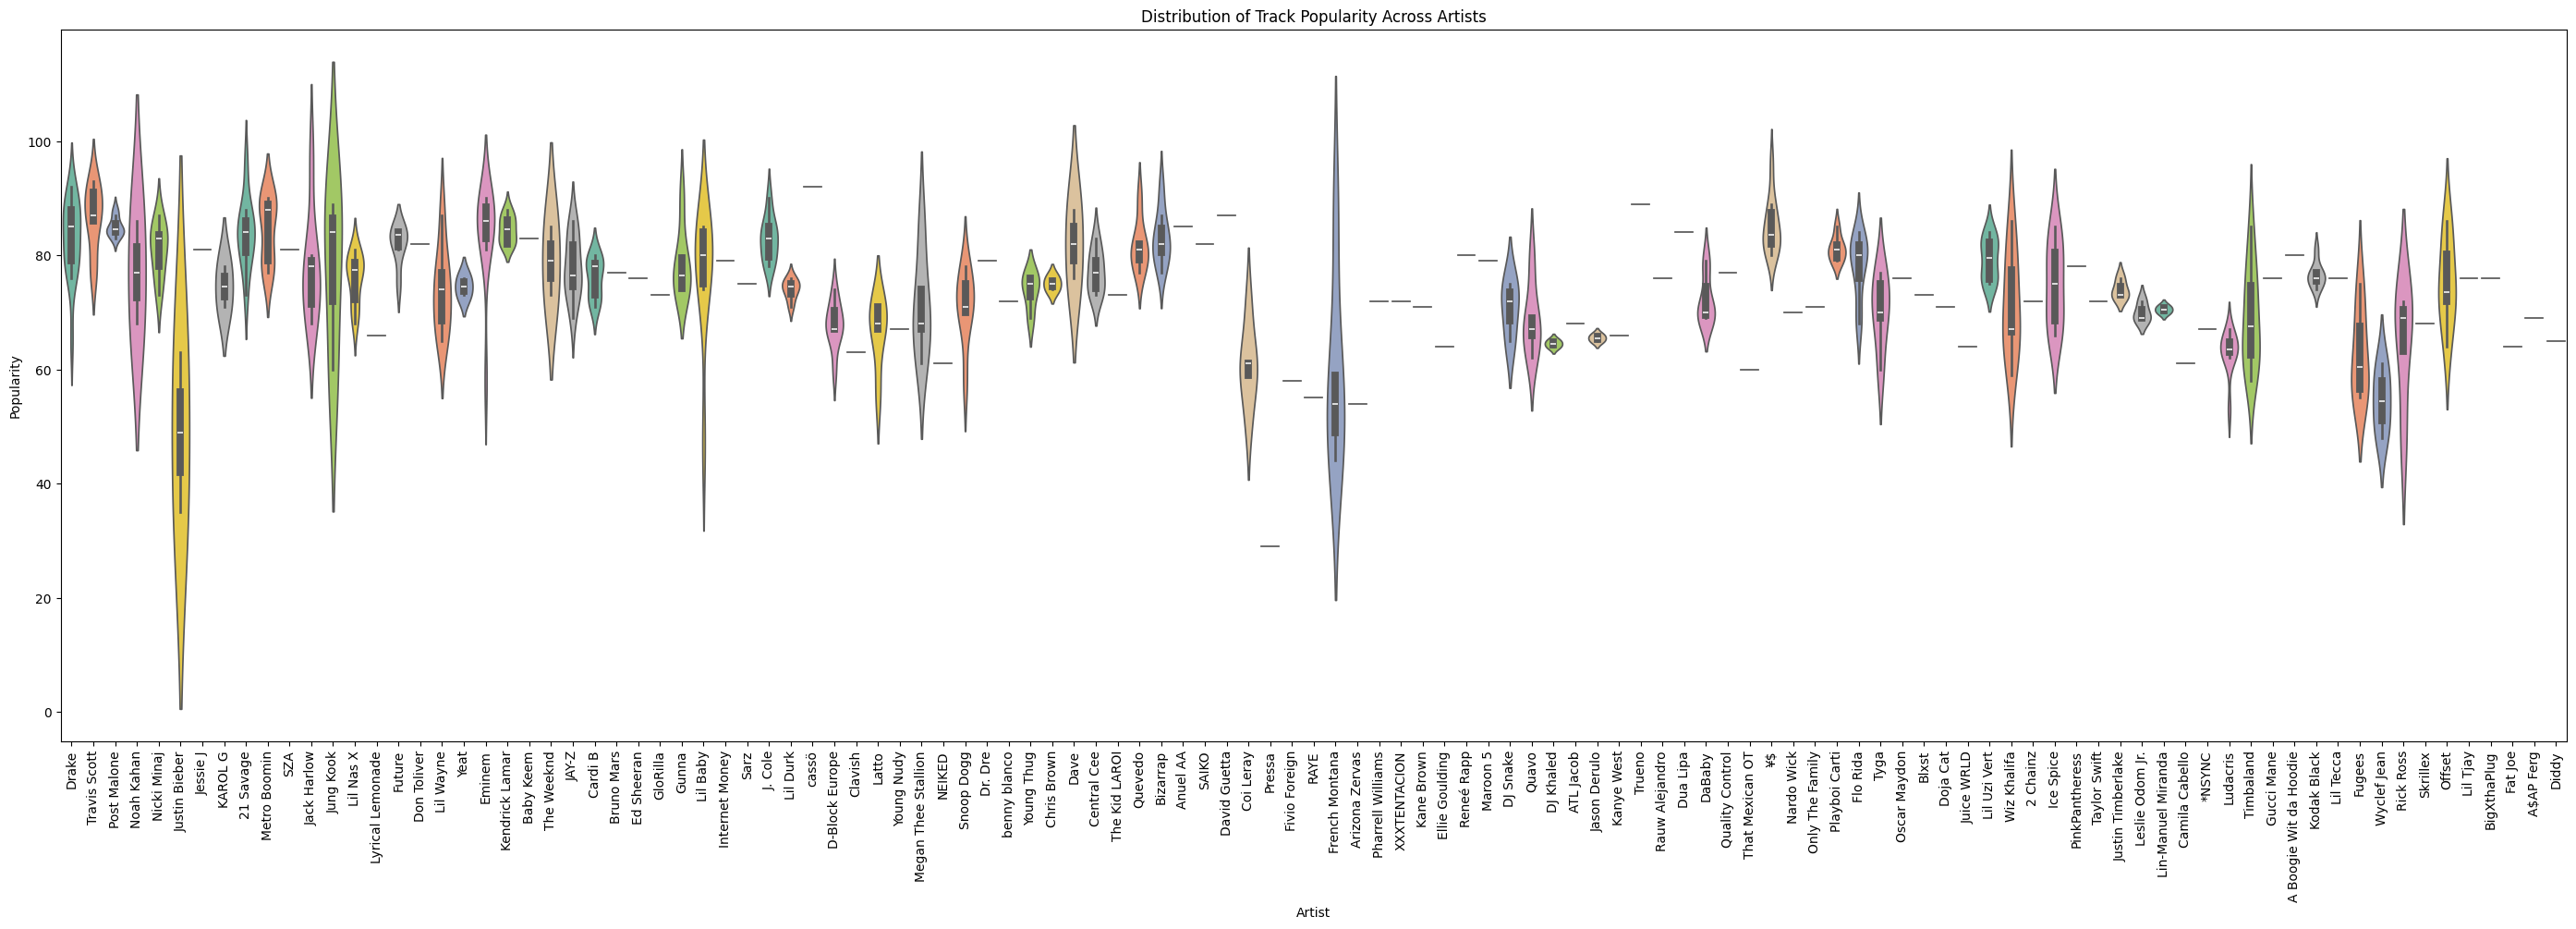

In [106]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(35, 10))
sns.violinplot(data=df3, x='Artist', y='Popularity', palette="Set2")
plt.title('Distribution of Track Popularity Across Artists')
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.show()